# Interactive visualization with Napari

This tutorial shows how to visualize the `squidpy.im.ImageContainer` and AnnData in Napari.

It can be useful to explore the results of Scanpy/Squidpy analysis in an interactive way. 
[Napari](https://napari.org/) is a multi-dimensional image viewer for python, which makes it very convenient for this purpose.
In this tutorial, we will show how Squidpy allows a seamless integration of Napari with the AnnData object, making it very easy to interactively explore the analysis results and visualize them on the high-resolution tissue image contained in `ImageContainer`.

For this tutorial, you might have to install additional libraries, make sure that you installed Squidpy with `pip install 'squidpy[interactive]'`.

As usual, let's import relevant libraries and load the data.

In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.8.0.dev78+gc488909a anndata==0.7.5 umap==0.4.6 numpy==1.20.1 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3
squidpy==1.0.0


In [2]:
adata = sq.datasets.visium_hne_adata()
img = sq.datasets.visium_hne_image()

In the following line, we actually start Napari. You will notice that an additional window will pop up with the Napari viewer.
We assign the Napari viewer to a new variable, `viewer`, in order to perform some useful manipulations, for instance taking screenshots.
For users familiar with `napari`, the `viewer` is a wrapper of the `napari.Viewer` and not the same object.

In [3]:
viewer = img.interactive(adata)

We can always visualize the Napari session in this notebook, by conveniently capturing a screenshot of the current image. This can be done with `viewer.screenshot()`.
All of the described functionalities are based on Napari layers and widget. You might want to familiarize yourself with some Napari [tutorials](https://napari.org/tutorials/index.html).

Here, let's take a screenshot of the canvas as well as the GUI with all the available widgets.

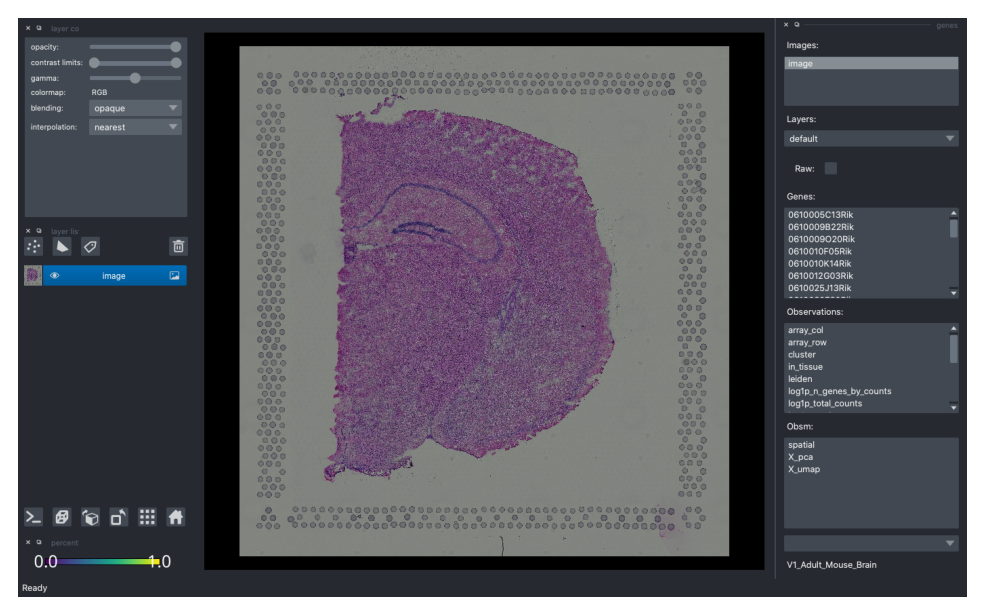

In [4]:
viewer.screenshot(canvas_only=False)

## Visualize observations and features from AnnData

On the right side of the Napari GUI, you can select and visualize the different slots in the AnnData object, such as:

- Genes from the default layer `adata.X` or other layers such as `adata.raw`.
- Observations saved in `adata.obs` (e.g. clustering results, QC metrics, other type of observation-level annotations).
- Features from `adata.obsm` (e.g., PCA results, computed image features and other observation-level representations).

The widgets are searchable, meaning that you can type the initials of e.g. your favorite gene and the menu will automatically scroll to the location automatically. 
In order to visualize the feature of interest as an additional layer, you can either press `Enter` or double-click on it.

For instance, let's visualize the expression levels for `Olig1`...

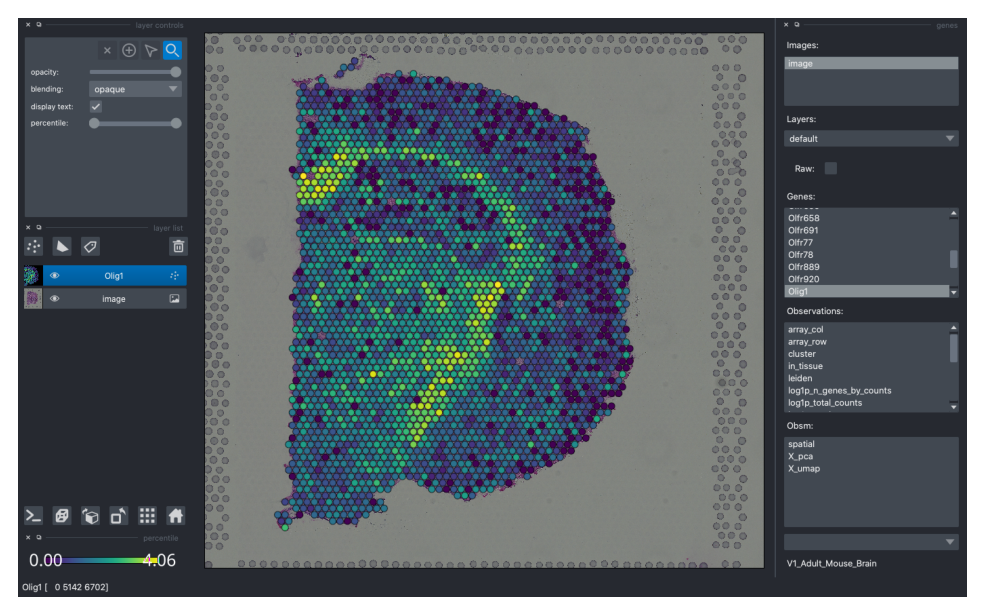

In [5]:
viewer.screenshot(canvas_only=False)

If you prefer to visualize only the canvas, `canvas_only = True` by default. Here's a zoomed in visualization:

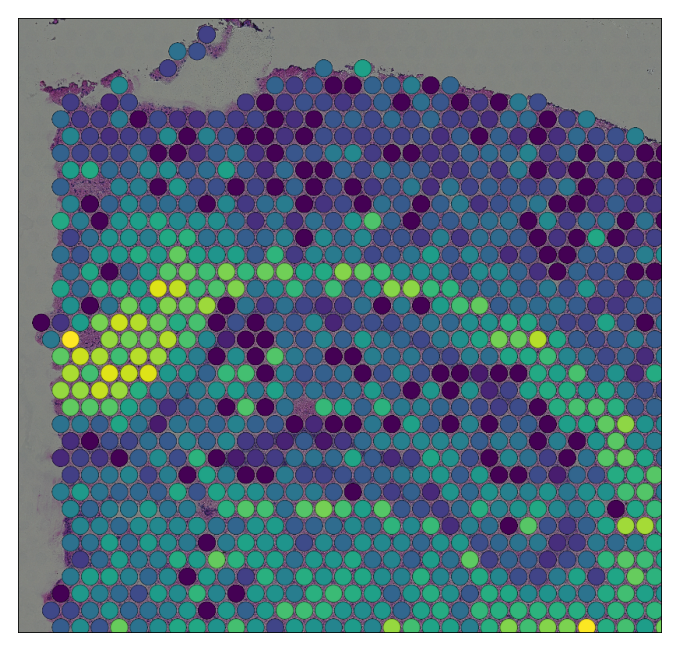

In [6]:
viewer.screenshot()

As mentioned, we can visualize the the clustering annotation saved under `adata.obs['cluster']`. Notice that by selecting and clicking the annotation, a new layer is created in Napari, on top of the previous one (see left side of the Napari GUI). You can modify the visualization of the layers by simply switching them off (clicking on the "eye" icon) or modifying the opacity (top left).

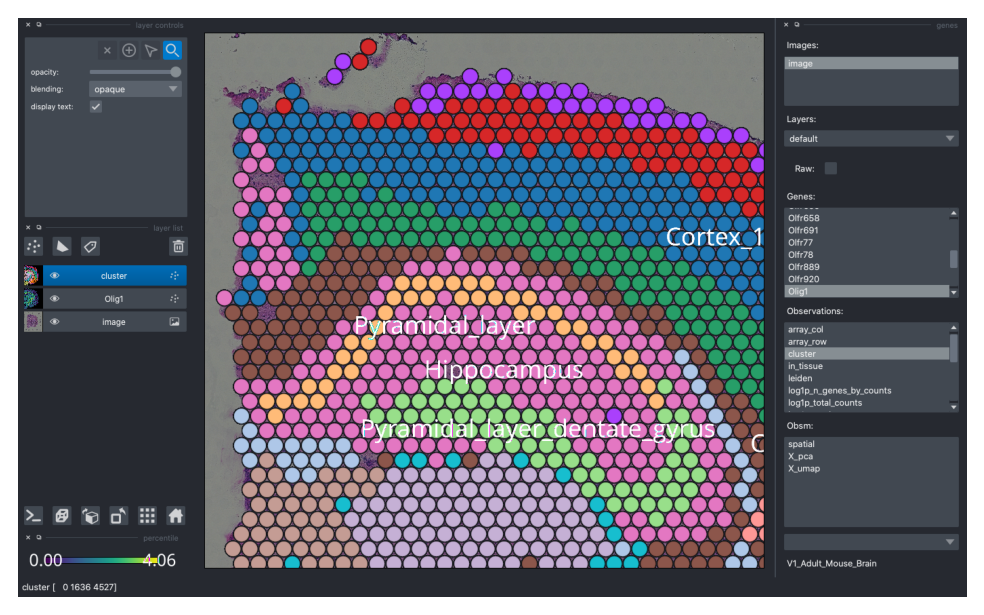

In [7]:
viewer.screenshot(canvas_only=False)

Slots in `adata.obsm` are also searchable and can be visualized. For instance, Squidpy stores the results of the image feature extraction step in `adata.obsm`. For the purpose of this tutorial, let's visualize the thirds Principal Component (select `X_pca` and then search for it in the bottom right menu).

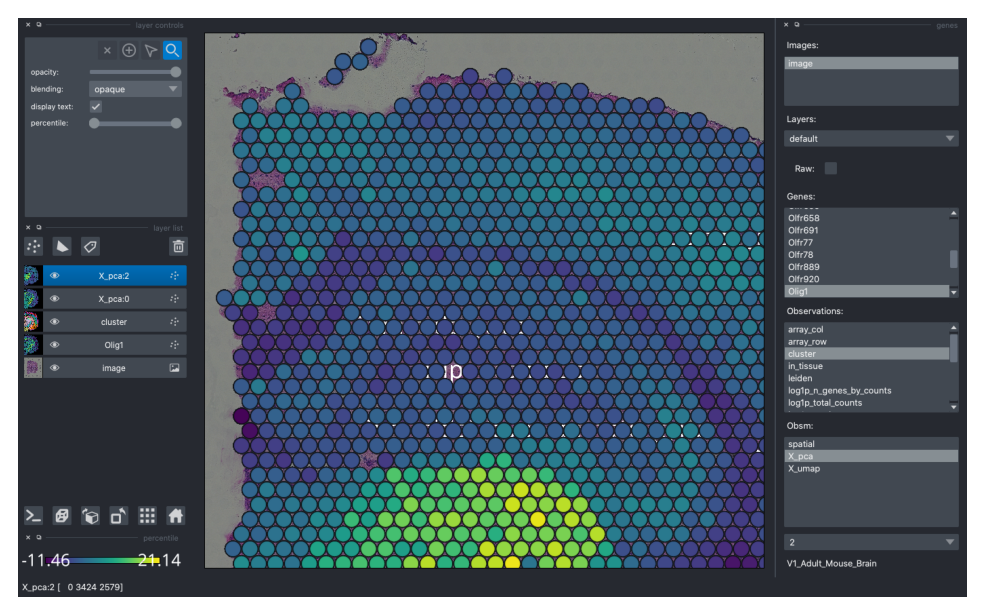

In [8]:
viewer.screenshot(canvas_only=False)

You can remove all the layers by simply clicking on the "bin" on the center-left side of the GUI.

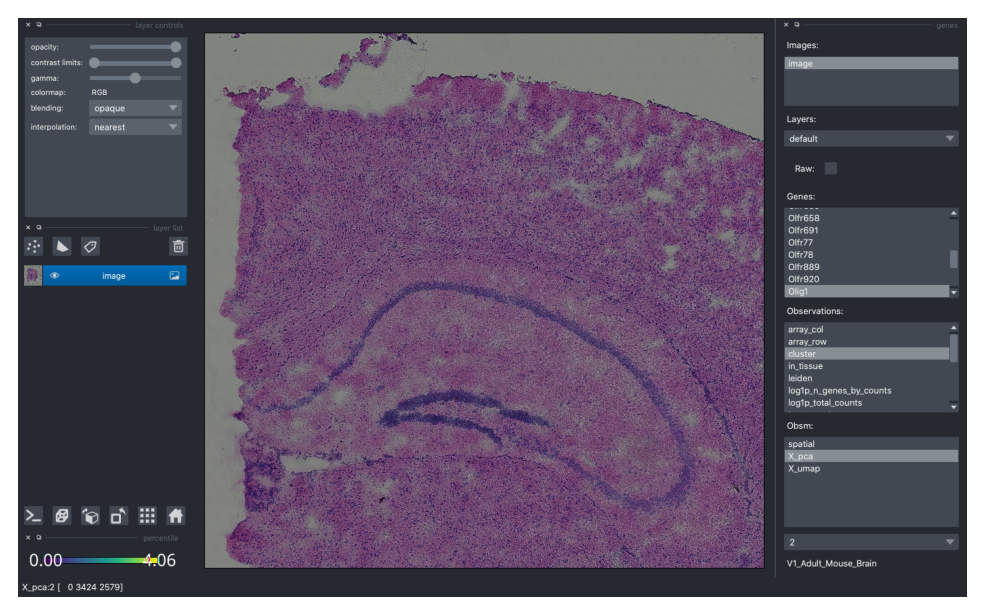

In [9]:
viewer.screenshot(canvas_only=False)

## Annotate tissue regions with the shape layer

Napari does not only serve as an interactive image viewer, but it can also be used to annotate manually regions of interest in the tissue. For that, you need to select the `Shapes layer` in Napari (widget on the left-side, icon shaped like a trapezoid), then select the `add polygons` icon and draw the polygon in the region of interest. You can have a look at the Napari [shapes layer tutorial](https://napari.org/tutorials/fundamentals/shapes.html) for further explanations.

Here, we are going to crop 2 regions of interests (assigned to the same `Shapes` layer).

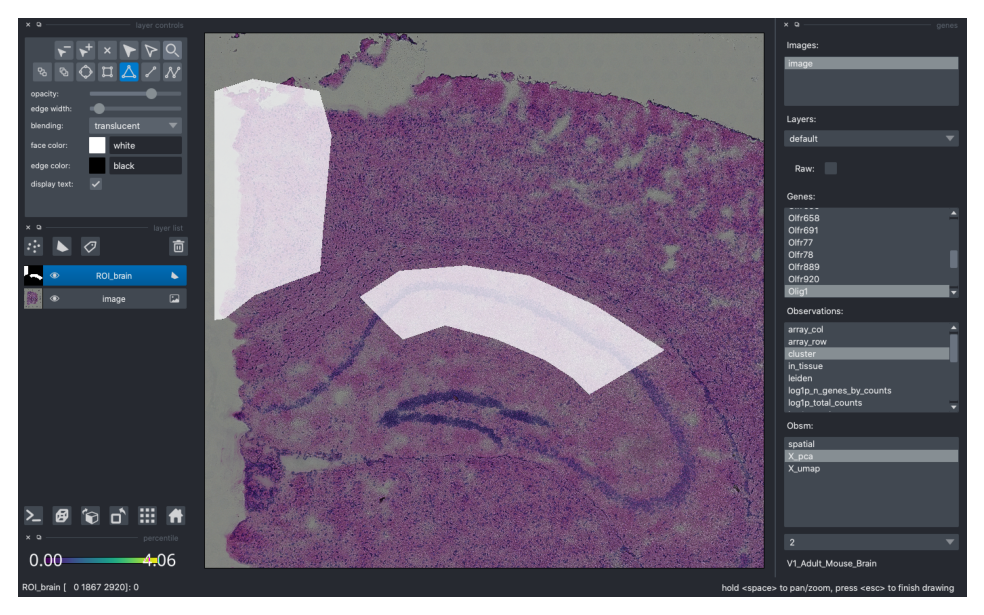

In [10]:
viewer.screenshot(canvas_only=False)

Now, drawing polygons on the tissue for the sake of it can be fun but not necessarily useful. It would be useful if we could transfer the information on the tissue region annotation to our observations, stored in `adata.obs`. Luckily, with our wrappers is trivial: just type `SHIFT+E` and the annotation is "converted" into a boolean vector in `adata.obs`. If the spot is "contained" by the polygon, it will be annotated as `True`, otherwise `False`.

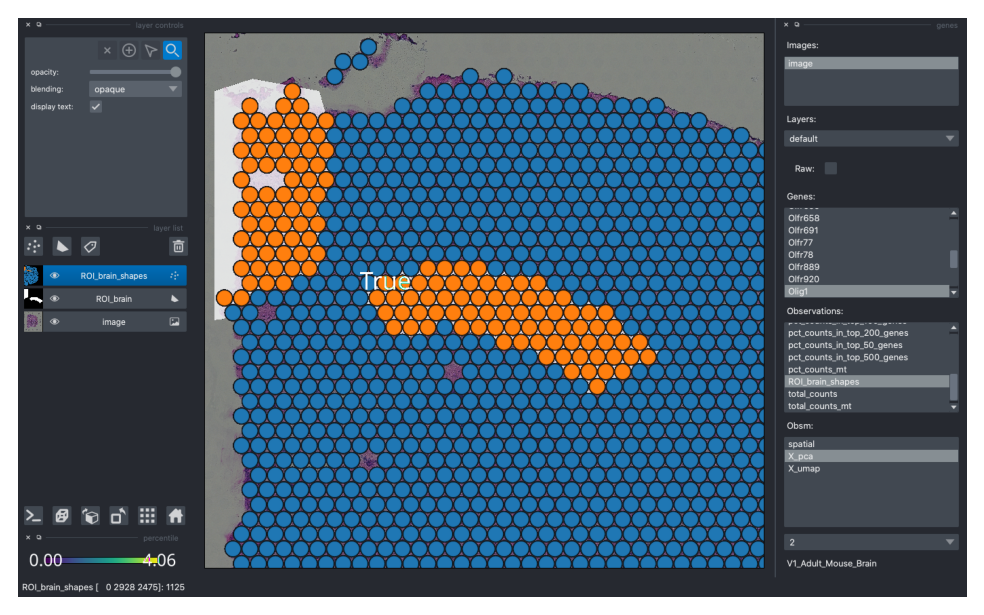

In [11]:
viewer.screenshot(canvas_only=False)

When typing `SHIFT+E` the annotation is saved under `adata.obs` and can be conveniently visualized.

This interactive annotation is particularly useful in the context of cancer pathology, where often times pathologist annotate the tissue based on morphology information, and the analyst might want to relate this annotation with other types of features (discrete or continuous) in downstream analysis.

Finally, recall that every everything that appears (and can be visualized) on the Napari Viewer, is stored in the AnnData object. Therefore, we can access it and visualize it anytime with Scanpy.

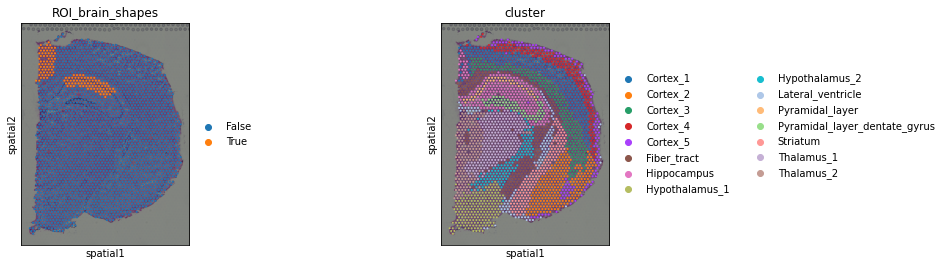

In [12]:
sc.pl.spatial(viewer.adata, color=["ROI_brain_shapes", "cluster"])

This is the end of this tutorial, feel free to checkout other [Squidpy tutorials](https://squidpy.readthedocs.io/en/latest/tutorials.html) as well as [Napari resources](https://napari.org/index.html)

In [13]:
viewer.close()